In [135]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score

In [84]:
df=pd.read_csv("loan_approval_data.csv")

In [85]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [86]:
df.shape

(1000, 20)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

## handling missing value

In [88]:
categorical_cols=df.select_dtypes(include=['object']).columns
numerical_col=df.select_dtypes(include=['float64']).columns

In [89]:
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [90]:
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [91]:
from sklearn.impute import SimpleImputer
num_imp=SimpleImputer(strategy='mean')
df[numerical_cols]=num_imp.fit_transform(df[numerical_cols])

In [92]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [93]:
cat_imp=SimpleImputer(strategy='most_frequent')
df[categorical_cols]=cat_imp.fit_transform(df[categorical_cols])

In [94]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

## EDA

Text(0.5, 1.0, 'loan approved or not')

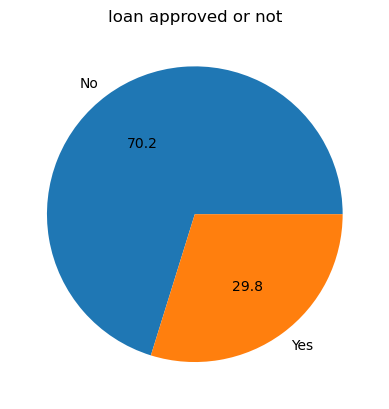

In [95]:
classes_count=df['Loan_Approved'].value_counts()
plt.pie(classes_count,labels=['No','Yes'],autopct='%1.1f')
plt.title('loan approved or not')

[Text(0, 0, '621'), Text(0, 0, '379')]

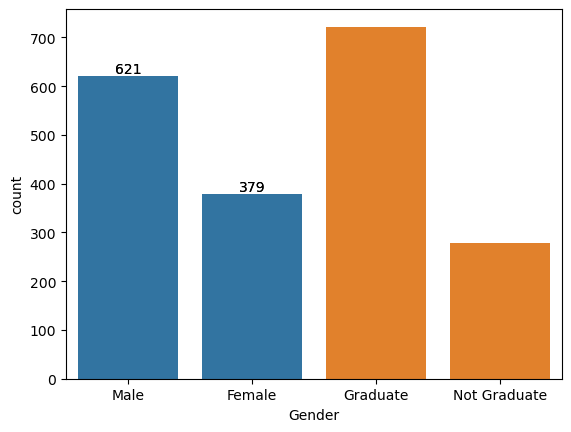

In [96]:
# analyze category
gen_count=df['Gender'].value_counts()
ax=sns.barplot(gen_count)
ax.bar_label(ax.containers[0])

edu_count=df['Education_Level'].value_counts()
ax=sns.barplot(edu_count)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

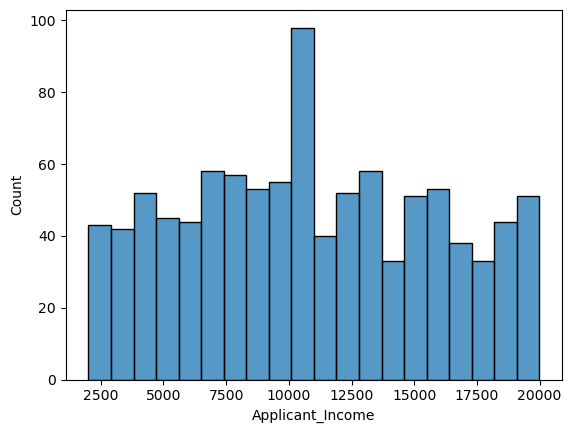

In [97]:
# analyze income
sns.histplot(data=df,
            x='Applicant_Income',
            bins=20)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

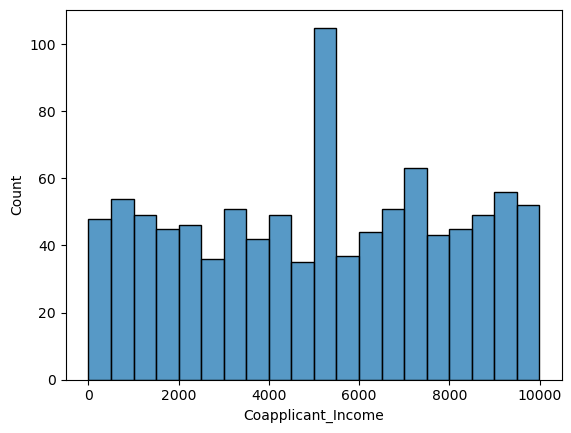

In [98]:
# analyze coapplicant_income
sns.histplot(data=df,
            x='Coapplicant_Income',
            bins=20)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

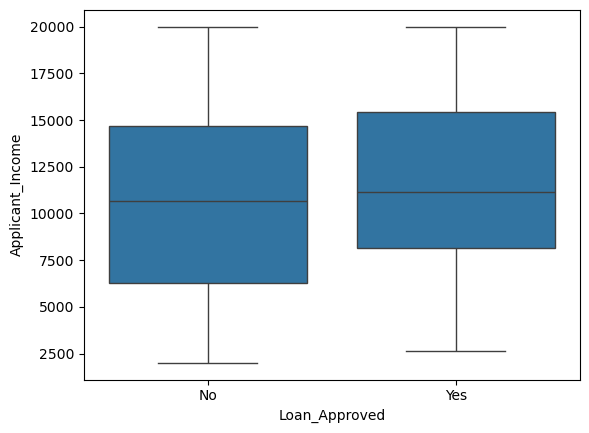

In [99]:
# outlier using box plot
sns.boxplot(
    data=df,
    x='Loan_Approved',
    y='Applicant_Income'
)

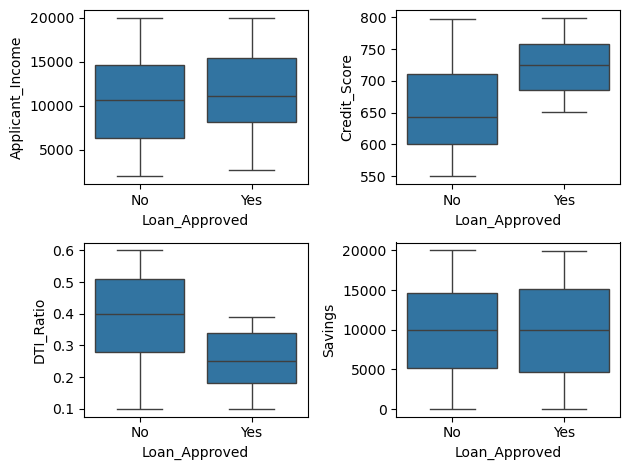

In [100]:
fig,axis=plt.subplots(2,2)
sns.boxplot(ax=axis[0,0],
            data=df,
            x='Loan_Approved',
            y='Applicant_Income'
           )
sns.boxplot(ax=axis[0,1],
            data=df,
            x='Loan_Approved',
            y='Credit_Score'
           )
sns.boxplot(ax=axis[1,0],
            data=df,
            x='Loan_Approved',
            y='DTI_Ratio'
           )
sns.boxplot(ax=axis[1,1],
            data=df,
            x='Loan_Approved',
            y='Savings'
           )
plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

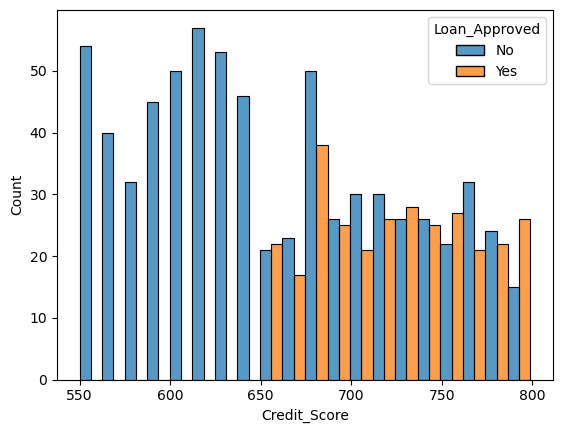

In [101]:
# credit score with loan approved
sns.histplot(data=df,
            x='Credit_Score',
            bins=20,
            hue='Loan_Approved',
             multiple='dodge'
            )

<Axes: xlabel='Applicant_Income', ylabel='Count'>

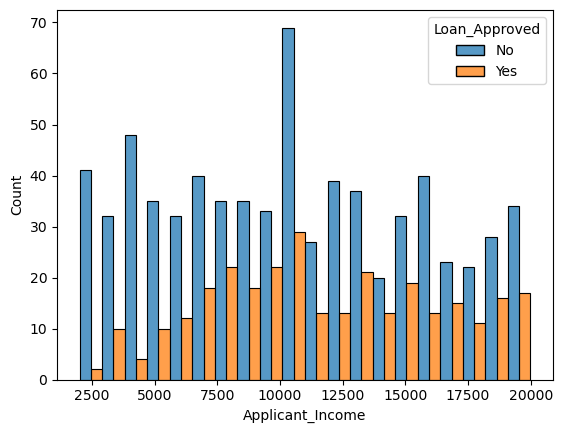

In [102]:
# credit score with Applicant Income
sns.histplot(data=df,
            x='Applicant_Income',
            bins=20,
            hue='Loan_Approved',
             multiple='dodge'
            )

In [103]:
df=df.drop(columns=['Applicant_ID'],axis=1)

In [104]:
df

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.000000,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.000000,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.000000,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.000000,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.000000,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.000000,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.000000,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.000000,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.000000,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.000000,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10852.571579,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.000000,43563.0,8311.0,72.0,Personal,Urban,Not Graduate,Male,Unemployed,No
996,3279.000000,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,9940.452632,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,15192.000000,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.000000,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,9083.000000,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.000000,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


## Encoding


In [105]:
df.head()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [106]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()

df['Education_Level']=le.fit_transform(df['Education_Level'])
df['Loan_Approved']=le.fit_transform(df['Loan_Approved'])

cols=['Marital_Status','Property_Area','Loan_Purpose','Gender','Employment_Status','Employer_Category']
ohe=OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore')
encode=ohe.fit_transform(df[cols])
encoded_df=pd.DataFrame(encode,columns=ohe.get_feature_names_out(cols),index=df.index)

In [107]:
df=pd.concat([df.drop(columns=cols),encoded_df],axis=1)

In [108]:
df.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Home,Loan_Purpose_Personal,Gender_Male,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [109]:
df.shape

(1000, 28)

## corelation heatmap

In [117]:
numerical_cols=df.select_dtypes(include=['number'])
corr_matrix=numerical_cols.corr()

<Axes: >

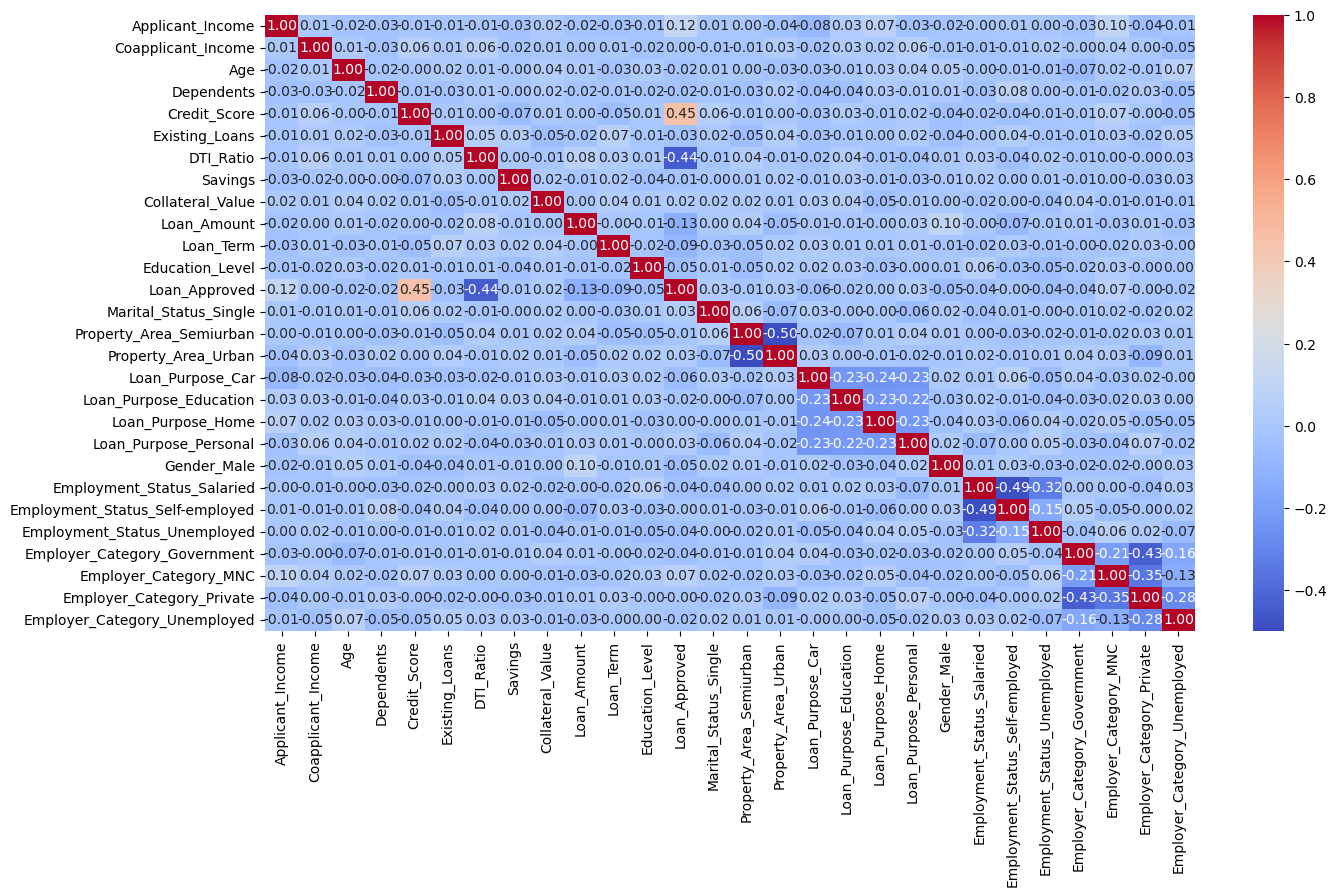

In [121]:
numerical_cols.corr()['Loan_Approved'].sort_values(ascending=False)
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,
           annot=True,
           fmt='.2f',
           cmap='coolwarm'
           )

## train test split

In [125]:
from sklearn.model_selection import train_test_split
features=df.drop(columns=['Loan_Approved'],axis=1)
result=df['Loan_Approved']

features_train,features_test,result_train,result_test=train_test_split(features,
                                                                      result,
                                                                      test_size=0.2,
                                                                      random_state=42)

## feature scaling


In [127]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_train_scaled=scaler.fit_transform(features_train)
features_test_scaled=scaler.transform(features_test)

## training and evaluation

# logistic regression

In [128]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=10000)
model.fit(features_train_scaled,result_train)

LogisticRegression(max_iter=10000)

In [131]:
result_pred=model.predict(features_test_scaled)

In [137]:
print("accuracy: ",accuracy_score(result_test,result_pred))
print("precision: ",precision_score(result_test,result_pred)) # true positive TF
print("recall: ",recall_score(result_test,result_pred)) #false negative FP
print("f1_score: ",f1_score(result_test,result_pred))
print("confusion_matrix: ",confusion_matrix(result_test,result_pred))

accuracy:  0.865
precision:  0.7833333333333333
recall:  0.7704918032786885
f1_score:  0.7768595041322314
confusion_matrix:  [[126  13]
 [ 14  47]]


# KNN

In [142]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(features_train_scaled,result_train)

KNeighborsClassifier()

In [143]:
result_pred=model.predict(features_test_scaled)

In [144]:
print("accuracy: ",accuracy_score(result_test,result_pred))
print("precision: ",precision_score(result_test,result_pred)) # true positive TF
print("recall: ",recall_score(result_test,result_pred)) #false negative FP
print("f1_score: ",f1_score(result_test,result_pred))
print("confusion_matrix: ",confusion_matrix(result_test,result_pred))

accuracy:  0.76
precision:  0.6274509803921569
recall:  0.5245901639344263
f1_score:  0.5714285714285714
confusion_matrix:  [[120  19]
 [ 29  32]]


# Naive bayes

In [146]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(features_train,result_train)

GaussianNB()

In [147]:
result_pred=model.predict(features_test)

In [148]:
print("accuracy: ",accuracy_score(result_test,result_pred))
print("precision: ",precision_score(result_test,result_pred)) # true positive TF
print("recall: ",recall_score(result_test,result_pred)) #false negative FP
print("f1_score: ",f1_score(result_test,result_pred))
print("confusion_matrix: ",confusion_matrix(result_test,result_pred))

accuracy:  0.74
precision:  0.576271186440678
recall:  0.5573770491803278
f1_score:  0.5666666666666667
confusion_matrix:  [[114  25]
 [ 27  34]]


## feature engineering

In [153]:
# add and transform features

df['DTI_Ratio_sq']=df['DTI_Ratio']**2
df['Credit_Score_sq']=df['Credit_Score']**2
df['Applicant_Income_log']=df['Applicant_Income']
features=df.drop(columns=['Loan_Approved','DTI_Ratio','Credit_Score','Applicant_Income'])
result=df['Loan_Approved']
from sklearn.model_selection import train_test_split
features_train,features_test,result_train,result_test=train_test_split(features,
                                                                      result,
                                                                      test_size=0.2,
                                                                      random_state=42)
scaler=StandardScaler()
features_train_scaled=scaler.fit_transform(features_train)
features_test_scaled=scaler.transform(features_test)

In [154]:
# logistic regression
model=LogisticRegression(max_iter=10000)
model.fit(features_train_scaled,result_train)
result_pred=model.predict(features_test_scaled)
print("accuracy: ",accuracy_score(result_test,result_pred))
print("precision: ",precision_score(result_test,result_pred)) # true positive TF
print("recall: ",recall_score(result_test,result_pred)) #false negative FP
print("f1_score: ",f1_score(result_test,result_pred))
print("confusion_matrix: ",confusion_matrix(result_test,result_pred))

accuracy:  0.875
precision:  0.7903225806451613
recall:  0.8032786885245902
f1_score:  0.7967479674796748
confusion_matrix:  [[126  13]
 [ 12  49]]


In [155]:
# knn 
model=KNeighborsClassifier(n_neighbors=5)
model.fit(features_train_scaled,result_train)
result_pred=model.predict(features_test_scaled)
print("accuracy: ",accuracy_score(result_test,result_pred))
print("precision: ",precision_score(result_test,result_pred)) # true positive TF
print("recall: ",recall_score(result_test,result_pred)) #false negative FP
print("f1_score: ",f1_score(result_test,result_pred))
print("confusion_matrix: ",confusion_matrix(result_test,result_pred))

accuracy:  0.755
precision:  0.62
recall:  0.5081967213114754
f1_score:  0.5585585585585585
confusion_matrix:  [[120  19]
 [ 30  31]]


In [156]:
# naive bayes
model=GaussianNB()
model.fit(features_train,result_train)
result_pred=model.predict(features_test)
print("accuracy: ",accuracy_score(result_test,result_pred))
print("precision: ",precision_score(result_test,result_pred)) # true positive TF
print("recall: ",recall_score(result_test,result_pred)) #false negative FP
print("f1_score: ",f1_score(result_test,result_pred))
print("confusion_matrix: ",confusion_matrix(result_test,result_pred))

accuracy:  0.715
precision:  0.5357142857142857
recall:  0.4918032786885246
f1_score:  0.5128205128205128
confusion_matrix:  [[113  26]
 [ 31  30]]
